# Neural ODE example notebook

Load packages/functionality from nODE and training

In [1]:
import torch
import numpy as np
from models.training import easyTrainer, weights_to_dataset
from models.nODE import nODE, make_nODE_from_parameters
import matplotlib.pyplot as plt
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')''

c:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generate repressilator dataset based on parameters

In [18]:
ODE_dim = 3
Gamma = np.array([-1., -1., -1.])
integration_time = 1
Win = np.array([[0, 0, -1.], [-1., 0, 0], [0,-1.,0]])
Wout = 2*np.eye(3)
bin = np.array([[2.], [2.], [2.]])
bout = np.array([[2.2], [2.], [2.]])

train_data, test_data = weights_to_dataset(integration_time, Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout, batch_size = 10)

true_model = make_nODE_from_parameters(Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)

Epoch 1: 4.598
Epoch 2: 1.985
Epoch 3: 1.152
Epoch 4: 0.980
Epoch 5: 0.911
Epoch 6: 0.877
Epoch 7: 0.849
Epoch 8: 0.815
Epoch 9: 0.777
Epoch 10: 0.742
Epoch 11: 0.710
Epoch 12: 0.679
Epoch 13: 0.646
Epoch 14: 0.609
Epoch 15: 0.572
Epoch 16: 0.539
Epoch 17: 0.512
Epoch 18: 0.492
Epoch 19: 0.478
Epoch 20: 0.468
Epoch 21: 0.461
Epoch 22: 0.454
Epoch 23: 0.446
Epoch 24: 0.436
Epoch 25: 0.423
Epoch 26: 0.406
Epoch 27: 0.388
Epoch 28: 0.374
Epoch 29: 0.364
Epoch 30: 0.353
Epoch 31: 0.338
Epoch 32: 0.328
Epoch 33: 0.324
Epoch 34: 0.319
Epoch 35: 0.311
Epoch 36: 0.305
Epoch 37: 0.303
Epoch 38: 0.297
Epoch 39: 0.289
Epoch 40: 0.283
Epoch 41: 0.278
Epoch 42: 0.269
Epoch 43: 0.262
Epoch 44: 0.258
Epoch 45: 0.253
Epoch 46: 0.247
Epoch 47: 0.245
Epoch 48: 0.243
Epoch 49: 0.239
Epoch 50: 0.238
Epoch 51: 0.236
Epoch 52: 0.233
Epoch 53: 0.232
Epoch 54: 0.230
Epoch 55: 0.227
Epoch 56: 0.226
Epoch 57: 0.224
Epoch 58: 0.222
Epoch 59: 0.221
Epoch 60: 0.219
Epoch 61: 0.218
Epoch 62: 0.217
Epoch 63: 0.216
E

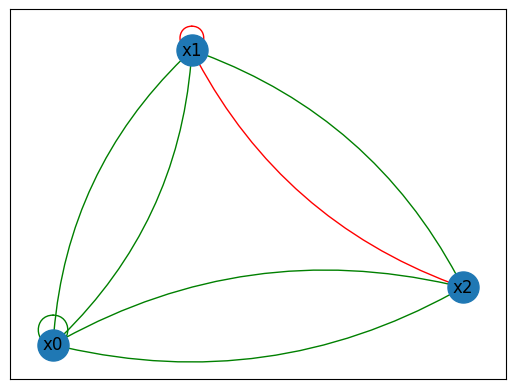

inside_weights
Gx + wtanh(x(t))+b    over the interval [0, 1],
G = [-3.0983834   0.34406635 -0.51735747], W = [[ 0.6146293   0.8532941   0.58782256]
 [ 0.75194997 -0.66216415 -0.5727842 ]
 [ 0.7991018   0.5759743  -0.16924359]],      b = [ 1.0396254  1.078548  -3.0741024]




In [19]:
node = nODE(ODE_dim, architecture='inside_weights', time_interval=[0, integration_time])

optimizer_node = torch.optim.Adam(node.parameters(), lr=1e-1)

trainer = easyTrainer(node, optimizer_node, device)

trainer.train(train_data, 400)

node.plot()
print(node)

Plot phase portrait based on current nODE parameters..


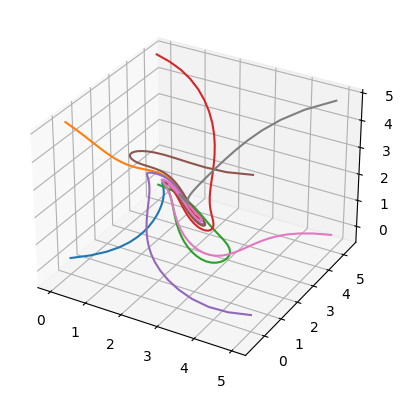

In [22]:
node.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])